<a href="https://colab.research.google.com/github/willian2610/Digital-Image-Processing/blob/master/Histogram_equalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the libraries needed to perform the task

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Loading and plotting the image to be worked on

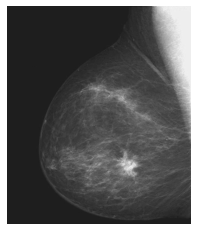

In [ ]:
img = cv2.imread('Fig0304.tif', cv2.IMREAD_GRAYSCALE) # Reading the image on grayscale

plt.axis("off")
plt.imshow(img, cmap='gray', vmin=0, vmax=255)

# Histogram Function

In [ ]:
def histogram (image):
  histogram_vector = np.zeros(256) # Defines a vector with the number of gray levels
  h, w = image.shape # Captures the dimensions of the matrix (height -> rows, width -> columns)

  # concatenated loops to traverse the entire image
  for x in range (0, h):
    for y in range (0, w):
      histogram_vector[image[x,y]] = histogram_vector[image[x,y]]+1 # Performs the quantification of each gray level in the histogram_vector
  return histogram_vector

# Equalization Function

In [ ]:
def equalization (image):
  h = histogram(image) # Loads the histogram of the image to be equalized, using the histogram function already created
  p = h/h.sum() # Calculates the probability of each gray level in the image
  CDF = p.cumsum() # Calculating the Cumulative Distribution Function (CDF)
  result = (CDF*255).astype('uint8') # Performs the normalization of the CDF to adapt it to the range that corresponds from 0 to 255
  return result

# Running the Histogram and Equalization functions

In [ ]:
histogram_image = histogram(img)
img_e = equalization(img)
equalizated_image = img_e[img]
histogram_img_equalizated = histogram(equalizated_image)

# Plotting results

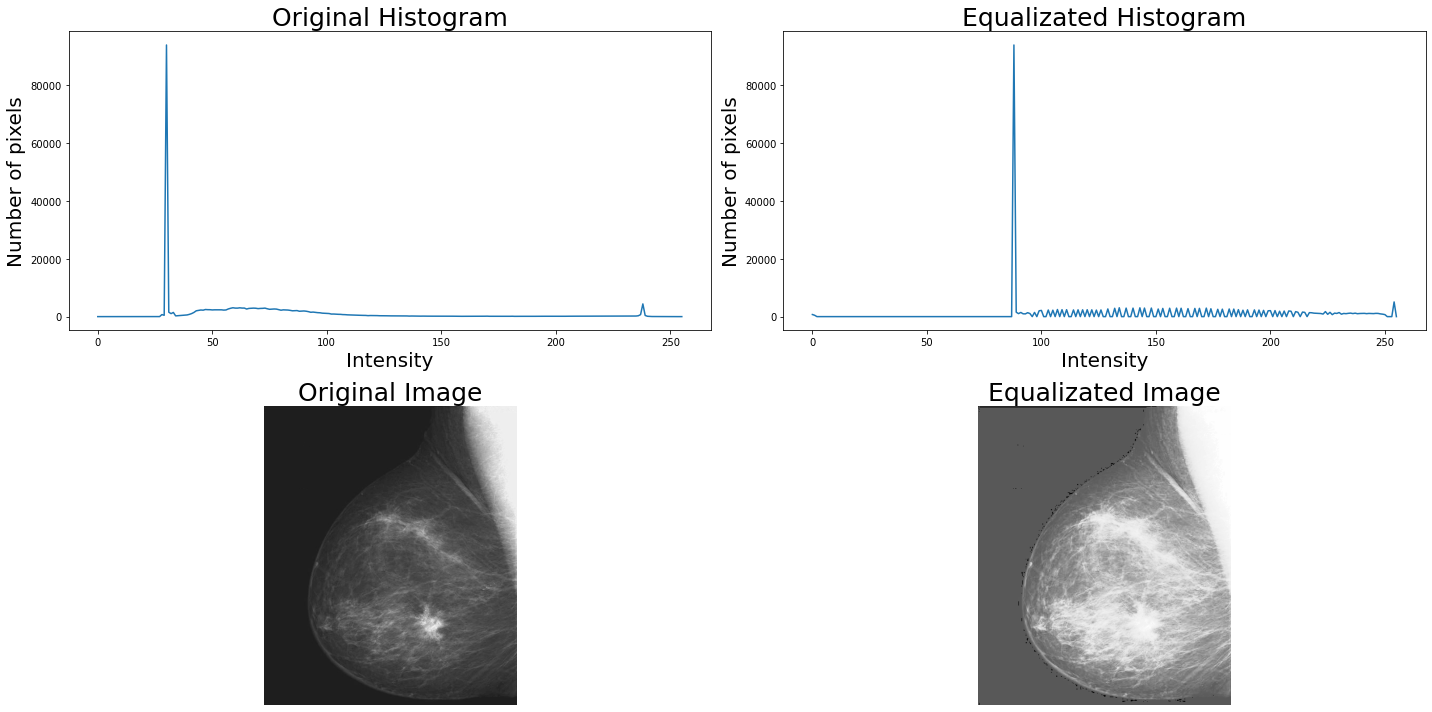

In [ ]:

plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
plt.title("Original Histogram", fontsize=25)
plt.xlabel("Intensity", fontsize=20)
plt.ylabel("Number of pixels", fontsize=20)
plt.plot(histogram_image)

plt.subplot(2,2,3)
plt.title("Original Image", fontsize=25)
plt.axis("off")
plt.imshow(img, cmap='gray', vmin=0, vmax=255)

plt.subplot(2,2,2)
plt.title("Equalizated Histogram", fontsize=25)
plt.xlabel("Intensity", fontsize=20)
plt.ylabel("Number of pixels", fontsize=20)
plt.plot(histogram_img_equalizated)

plt.subplot(2,2,4)
plt.title("Equalizated Image", fontsize=25)
plt.axis("off")
plt.imshow(equalizated_image, cmap='gray', vmin=0, vmax=255)

plt.tight_layout()